In [1]:
!pip install wordcloud
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/behnam/Downloads/airline dataset/airline_reviews_kaggle_train.csv')
pd.set_option('display.max_colwidth', 1000)

In [3]:
df.head()

Unnamed: 0                                  review_date  \
0           0    Monday, September 18, 2023 at 03:29:15 AM   
1           1                                December 2023   
2           2  Wednesday, September 6, 2023 at 01:58:27 AM   
3           3     Sunday, September 9, 2018 at 08:37:11 PM   
4           4     Monday, December 23, 2019 at 02:00:19 PM   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        review_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                             EasyJet sent text at 4.00 am day of flight home cancelling flight.\nLeft to rush round organising new flight, transport and hotel.\nHuge effort and implications.\nSeems EasyJet could not care less.   
1     Its been a few years when I flew a lot in Asia, so flying this time to India with Vistara was a surprise: The check-in was swift, the service immaculate (especially the stewardess Eshey. The biggest surprise was the menu, an how delicious the different choices were done. Except from the nowadays still rubbery buns, we had Indian and Oriental menus with tastes, The only disappointment was that a plane as big as the 787 had to squeeze in a 3-3-3 arrangement in this class, when I expected 2-3-2. But - all in all - I would always fly again with this airline, provided the service remains that excellent.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Useful   
3                                                                                                                                                                                                                                                                                                                                                                                                                   one of the worst experiences with Air France ever..\nRude and unhelpful staff,no customer service,staff not interested in carrying out there work duties.\n\ndelayed luggage on outbound and inbound flights...   
4                                                                                                                                              Not a single star this airlines deserves .I lost my baggage & from last 1.5 month they nearly blocked all my numbers & emails and not responding to my mails.\n\nI don't understand how a operator work like this, harrasing customer is their job.Not a single person from egypt airlines is helping me when i call to customer incase they lift they tell to update within 10 mins but never return back.\n\nI have all do

In [4]:
df_u1 = df.drop(['Unnamed: 0', 'review_date'], axis=1)
df_u2 = df_u1.loc[df['NPS_category'] == 'Detractor']

In [5]:
df_u2

review_text  \
0                                                                                                                                                                                                                                                                                                                                                         EasyJet sent text at 4.00 am day of flight home cancelling flight.\nLeft to rush round organising new flight, transport and hotel.\nHuge effort and implications.\nSeems EasyJet could not care less.   
3                                                                                                                                                                                                                                                                                                                                               one of the worst experiences with Air France ever..\nRude and unhelpful staff,no customer service,staff not interested in carrying out there work duties.\n\ndelayed luggage on outbound and inbound flights...   
4                                                                          Not a single star this airlines deserves .I lost my baggage & from last 1.5 month they nearly blocked all my numbers & emails and not responding to my mails.\n\nI don't understand how a operator work like this, harrasing customer is their job.Not a single person from egypt airlines is helping me when i call to customer incase they lift they tell to update within 10 mins but never return back.\n\nI have all documented & audio proof , iam going to address it to IATA   
5                                                                                                                                                                                                                                                                                                            I was forced to pay 150-euro worth penalty for failing to do the online check-in. Who on earth would dare to check emails in the holiday season?\n\nHorrible experience, arrogant attitude of ground-operation/check in counter at Prague airport.   
6                                                                                                                                                                                                                              It is the worst flying company ever.\nI never know where to start. No customer service or support. Forget to communicate in English. Nobody knows anything. They shout very much and don't respect customers. They don't know that Denmark is an EU country. The ask the other EU citizens for a visa to Denmark the whole time.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ...   
65736  To be fair , the flight was on time on both legs from Birmingham to Jersey , pleasant staff generally. We took carry on bag from Birmingham, no problem , but on return flight , were both charged £50 each . They seem to have a slightly smaller size allowance for carry on . Staff in jersey were there to generate revenue for oversize bags and didn’t seem to want to check everyone . On first leg the bag fitted very easily into overhead locker .\nSharp practice and I won’t fly them again . No wonder they are getting such poor reviews !   
65737                                                                                                                                                       

In [6]:
df_u3 = df_u2.drop(['NPS_category'], axis=1)
df_u3

review_text  \
0                                                                                                                                                                                                                                                                                                                                                         EasyJet sent text at 4.00 am day of flight home cancelling flight.\nLeft to rush round organising new flight, transport and hotel.\nHuge effort and implications.\nSeems EasyJet could not care less.   
3                                                                                                                                                                                                                                                                                                                                               one of the worst experiences with Air France ever..\nRude and unhelpful staff,no customer service,staff not interested in carrying out there work duties.\n\ndelayed luggage on outbound and inbound flights...   
4                                                                          Not a single star this airlines deserves .I lost my baggage & from last 1.5 month they nearly blocked all my numbers & emails and not responding to my mails.\n\nI don't understand how a operator work like this, harrasing customer is their job.Not a single person from egypt airlines is helping me when i call to customer incase they lift they tell to update within 10 mins but never return back.\n\nI have all documented & audio proof , iam going to address it to IATA   
5                                                                                                                                                                                                                                                                                                            I was forced to pay 150-euro worth penalty for failing to do the online check-in. Who on earth would dare to check emails in the holiday season?\n\nHorrible experience, arrogant attitude of ground-operation/check in counter at Prague airport.   
6                                                                                                                                                                                                                              It is the worst flying company ever.\nI never know where to start. No customer service or support. Forget to communicate in English. Nobody knows anything. They shout very much and don't respect customers. They don't know that Denmark is an EU country. The ask the other EU citizens for a visa to Denmark the whole time.   
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ...   
65736  To be fair , the flight was on time on both legs from Birmingham to Jersey , pleasant staff generally. We took carry on bag from Birmingham, no problem , but on return flight , were both charged £50 each . They seem to have a slightly smaller size allowance for carry on . Staff in jersey were there to generate revenue for oversize bags and didn’t seem to want to check everyone . On first leg the bag fitted very easily into overhead locker .\nSharp practice and I won’t fly them again . No wonder they are getting such poor reviews !   
65737                                                                                                                                                       

In [7]:
df_u3.airline_name.value_counts()

airline_name
british airways    10511
ryanair             6266
lufthansa           2397
easyjet             2013
flybe               1547
                   ...  
alrosa                 1
spring airlines        1
Air Peace              1
Firefly                1
aircalin               1
Name: count, Length: 446, dtype: int64

In [8]:
df_selected = df_u3[(df_u3['airline_name']=='british airways') |(df_u3['airline_name']=='ryanair')|(df_u3['airline_name']=='lufthansa')|(df_u3['airline_name']=='easyjet')]
df_selected

review_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        EasyJet sent text at 4.00 am day of flight home cancelling flight.\nLeft to rush round organising new flight, transport and hotel.\nHuge effort and implications.\nSeems EasyJet could not care less.   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           I was forced to pay 150-euro worth penalty for failing to do the online check-in. Who on earth would dare to check emails in the holiday season?\n\nHorrible experience, arrogant attitude of ground-operation/check in counter at Prague airport.   
10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            The company Ryanair not very good\nyou have to pay for the suitcase twice because I have a stopover and take another flight but same company , in my opinion it's very wrong, I'm not satisfied at all, bad idea   
11                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Flight cancelled due to weather. It happens I understand. Trying to change flights to what we wanted took in excess of 4 hours. In the end my missus had to shame them on twitter for them to do anything. The people on the end of the phone only have limited english language and are not helpful at all. Asked them to confirm cancelation was due to weather via email, still w

In [9]:
df_selected.shape

(21187, 2)

In [10]:
##### EDA starts here
df_selected.airline_name.value_counts()

airline_name
british airways    10511
ryanair             6266
lufthansa           2397
easyjet             2013
Name: count, dtype: int64

In [11]:
df_selected_british=df_selected[(df_selected['airline_name']=='british airways')]
df_selected_ryanair=df_selected[(df_selected['airline_name']=='ryanair')]
df_selected_lufthansa=df_selected[(df_selected['airline_name']=='lufthansa')]
df_selected_easyjet=df_selected[(df_selected['airline_name']=='easyjet')]

Text(0.5, 1.0, 'Word Cloud for British Airways')

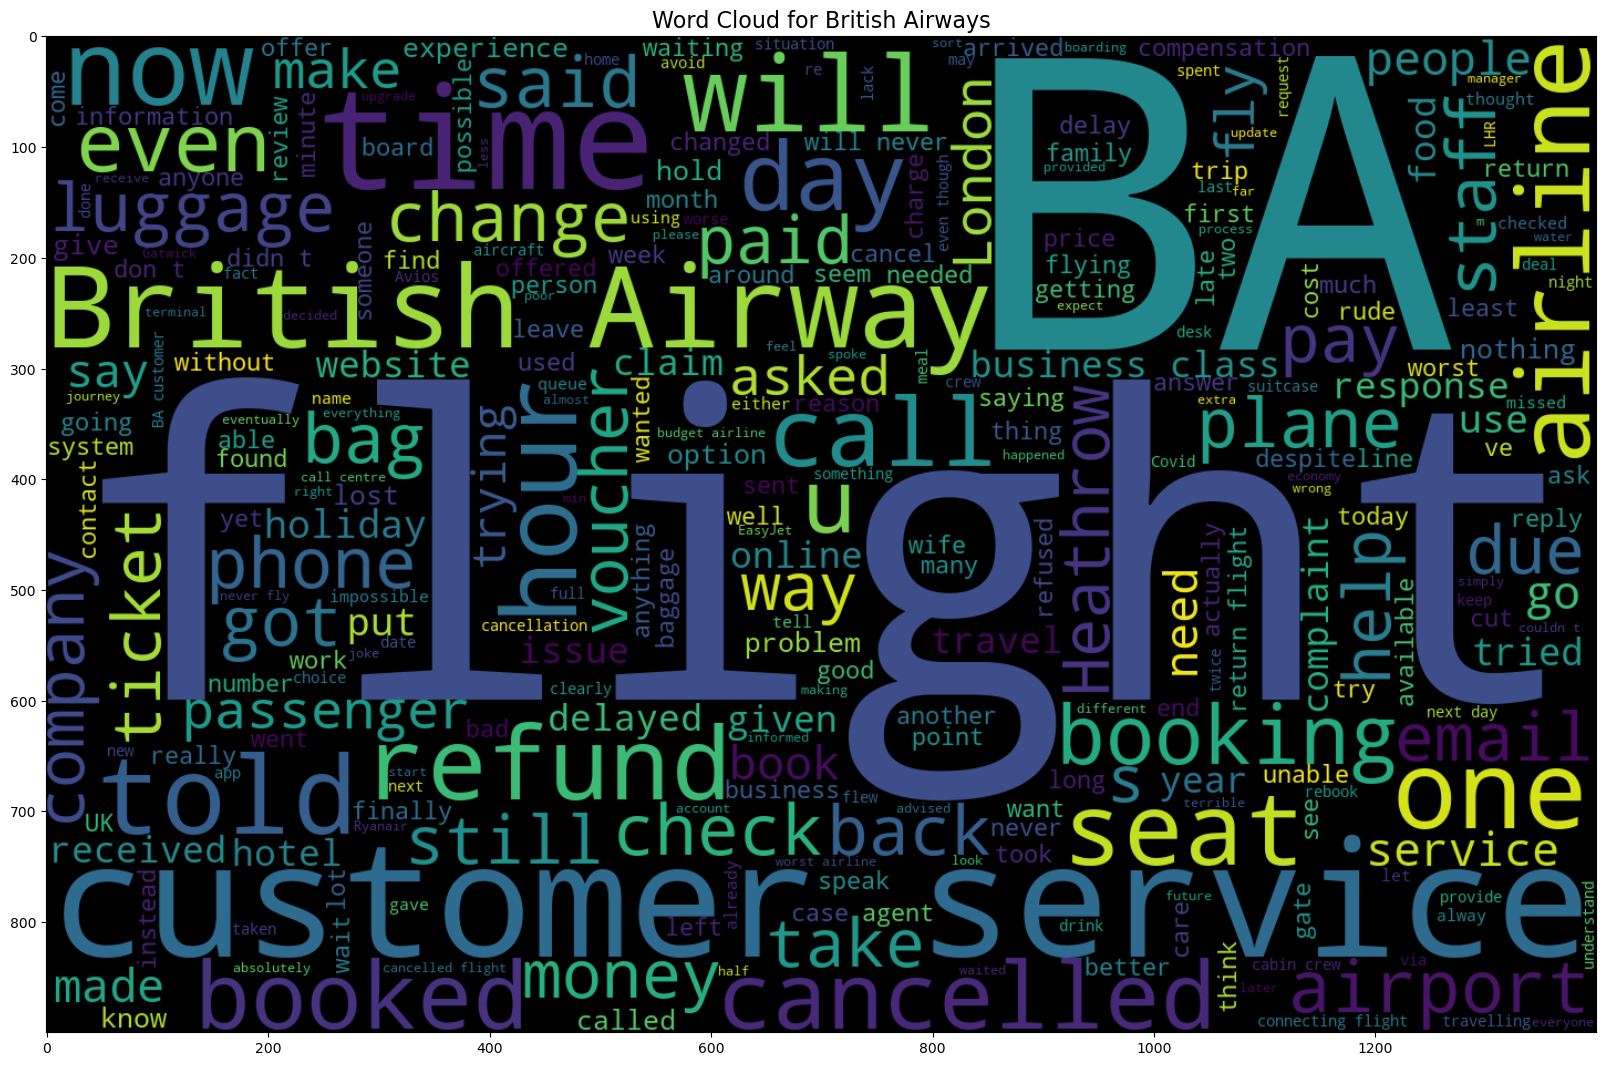

In [12]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=300, width=1400, height=900).generate(  ' '.join(df_selected_british.review_text))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for British Airways' , fontsize =16)

Text(0.5, 1.0, 'Word Cloud for Ryanair')

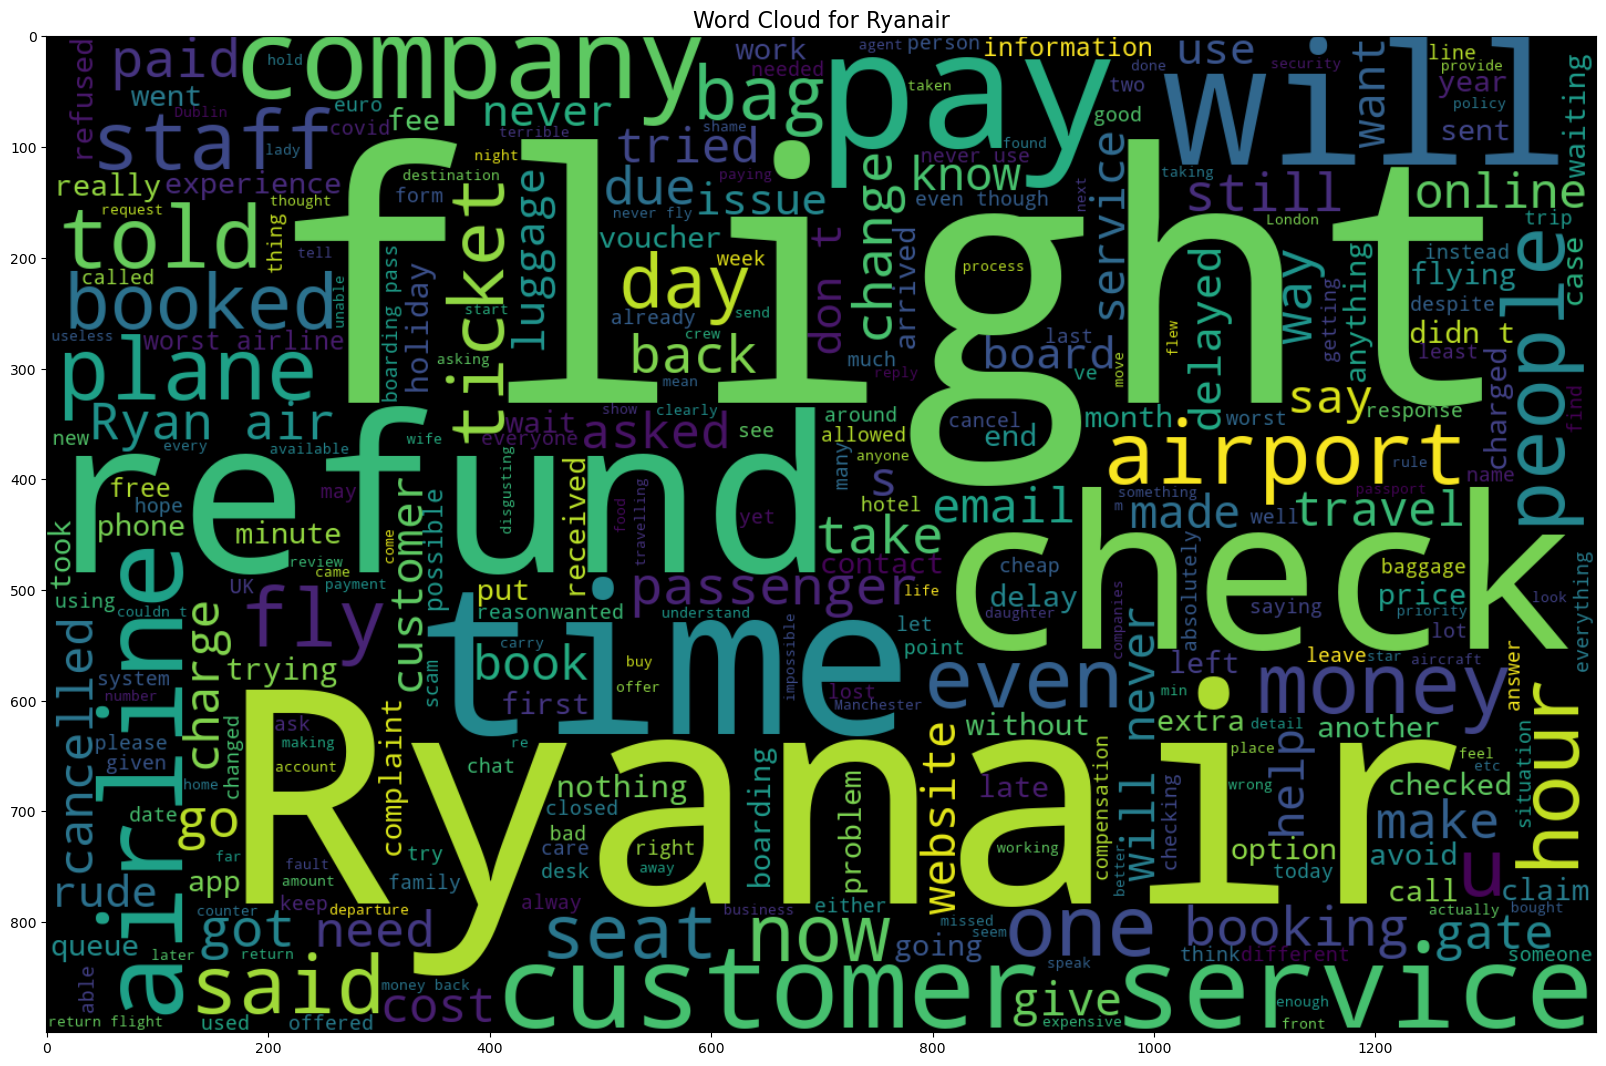

In [13]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=300, width=1400, height=900).generate(  ' '.join(df_selected_ryanair.review_text))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for Ryanair' , fontsize =16)

Text(0.5, 1.0, 'Word Cloud for Lufthansa')

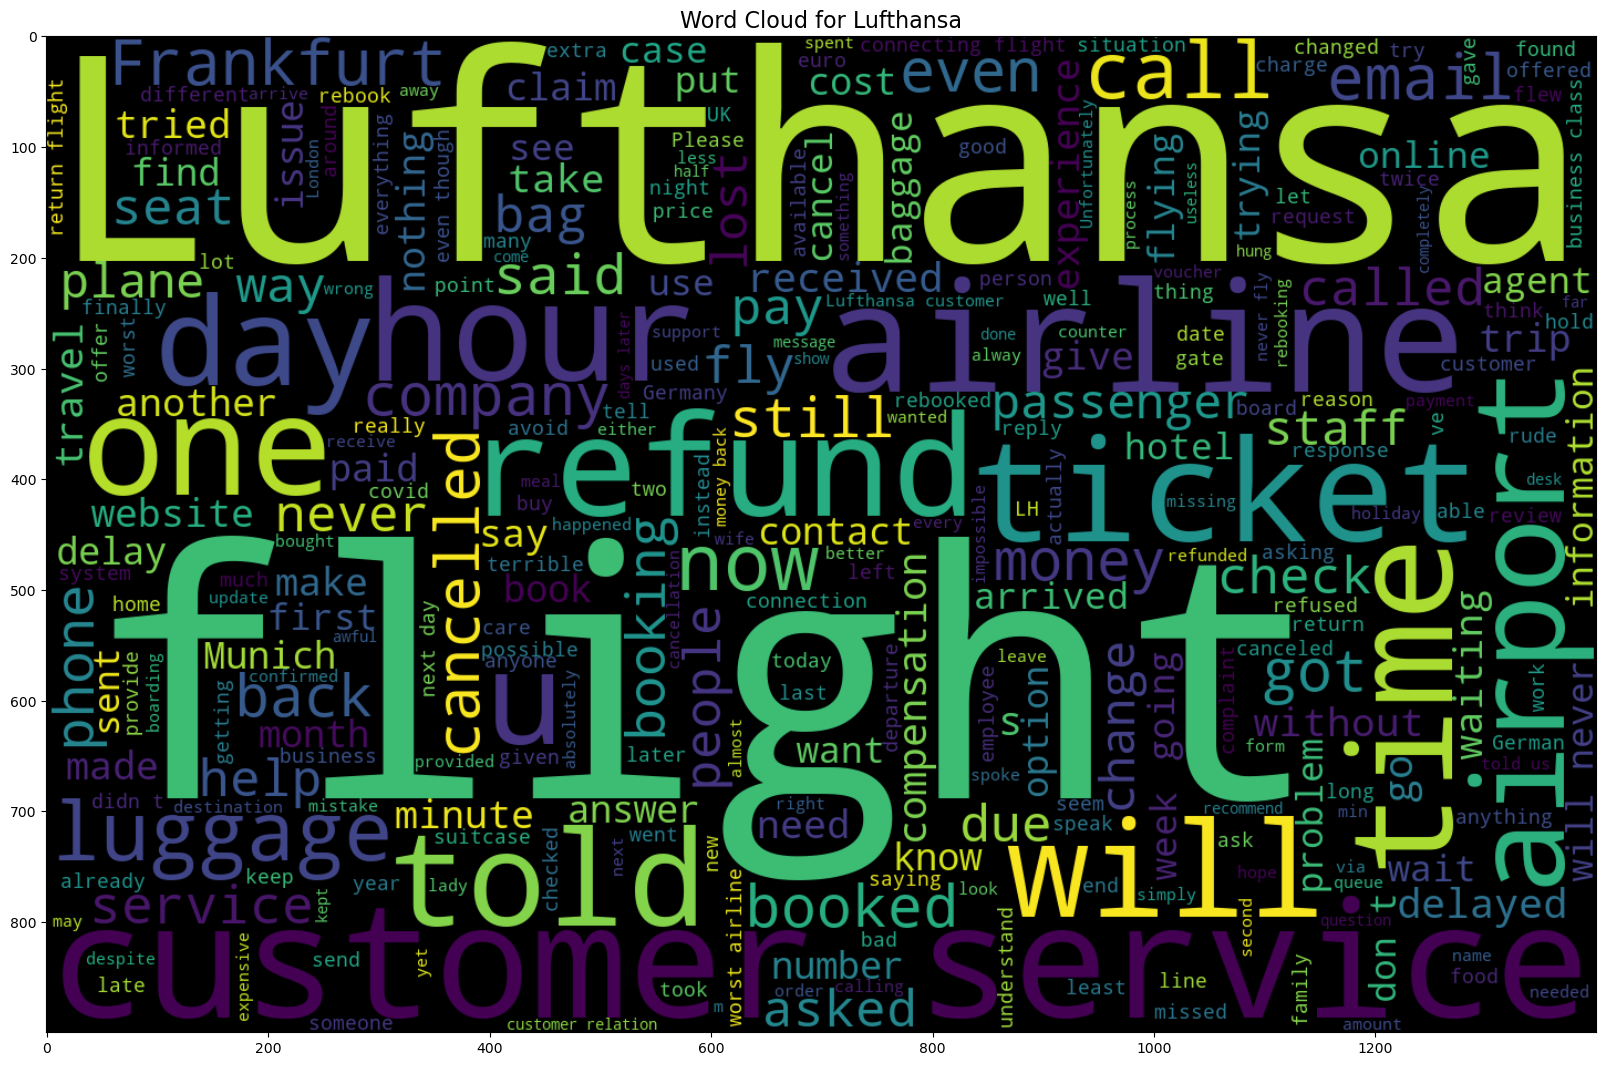

In [14]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=300, width=1400, height=900).generate(  ' '.join(df_selected_lufthansa.review_text))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for Lufthansa' , fontsize =16)

Text(0.5, 1.0, 'Word Cloud for Easyjet')

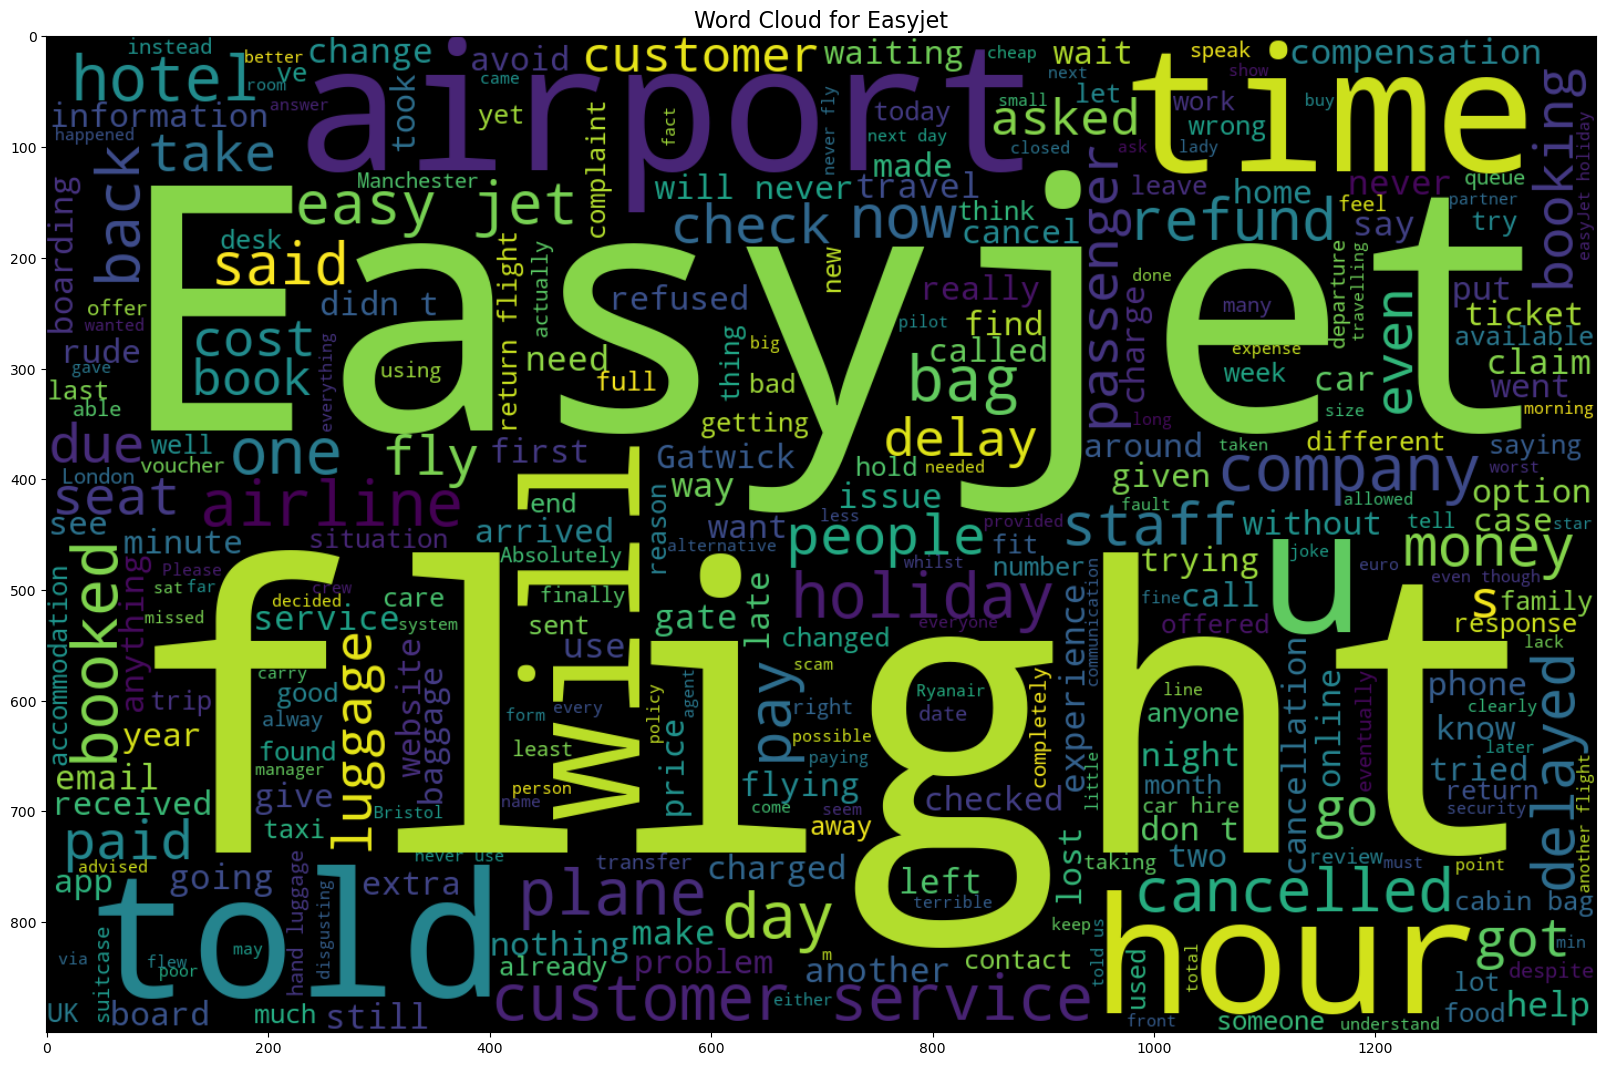

In [15]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=300, width=1400, height=900).generate(  ' '.join(df_selected_easyjet.review_text))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for Easyjet' , fontsize =16)

In [16]:
# data Preprocessing
df_selected['review_text'].iloc[3]

'Flight cancelled due to weather. It happens I understand. Trying to change flights to what we wanted took in excess of 4 hours. In the end my missus had to shame them on twitter for them to do anything. The people on the end of the phone only have limited english language and are not helpful at all. Asked them to confirm cancelation was due to weather via email, still waiting for them to confirm 2 weeks after the email.'

In [17]:
for i,col, in enumerate (df_selected.columns):
    df_selected.iloc[:,i]=df_selected.iloc[:,i].str.replace('"','')

In [18]:
df_selected

review_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        EasyJet sent text at 4.00 am day of flight home cancelling flight.\nLeft to rush round organising new flight, transport and hotel.\nHuge effort and implications.\nSeems EasyJet could not care less.   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           I was forced to pay 150-euro worth penalty for failing to do the online check-in. Who on earth would dare to check emails in the holiday season?\n\nHorrible experience, arrogant attitude of ground-operation/check in counter at Prague airport.   
10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            The company Ryanair not very good\nyou have to pay for the suitcase twice because I have a stopover and take another flight but same company , in my opinion it's very wrong, I'm not satisfied at all, bad idea   
11                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Flight cancelled due to weather. It happens I understand. Trying to change flights to what we wanted took in excess of 4 hours. In the end my missus had to shame them on twitter for them to do anything. The people on the end of the phone only have limited english language and are not helpful at all. Asked them to confirm cancelation was due to weather via email, still w

In [19]:
from nltk.corpus import stopwords

stop= stopwords.words('english')

In [20]:
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

In [21]:
from bs4 import BeautifulSoup
import re

In [22]:
def review_word(raw_review):
    review_passage=BeautifulSoup(raw_review,'html.parser').get_text()
    makespace=re.sub('[^a-zA-Z]',' ', review_passage)
    lowerletters=makespace.lower().split()
    meaningfulwords=[i for i in lowerletters if not i in stop]
    lemmatizewords=[lemmatizer.lemmatize(i) for i in meaningfulwords]
    return (' '.join(lemmatizewords))

In [23]:
df_selected.loc[:, 'review_clean'] = df_selected['review_text'].apply(review_word)

/var/folders/tw/7ll0wdbj74l7x0yh24m2rfn80000gn/T/ipykernel_46470/180837889.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_passage=BeautifulSoup(raw_review,'html.parser').get_text()
/var/folders/tw/7ll0wdbj74l7x0yh24m2rfn80000gn/T/ipykernel_46470/1947931099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'review_clean'] = df_selected['review_text'].apply(review_word)


In [24]:
df_selected.head()

review_text  \
0                                                                                                                                                                                                                                     EasyJet sent text at 4.00 am day of flight home cancelling flight.\nLeft to rush round organising new flight, transport and hotel.\nHuge effort and implications.\nSeems EasyJet could not care less.   
5                                                                                                                                                                                        I was forced to pay 150-euro worth penalty for failing to do the online check-in. Who on earth would dare to check emails in the holiday season?\n\nHorrible experience, arrogant attitude of ground-operation/check in counter at Prague airport.   
10                                                                                                                                                                                                                         The company Ryanair not very good\nyou have to pay for the suitcase twice because I have a stopover and take another flight but same company , in my opinion it's very wrong, I'm not satisfied at all, bad idea   
11  Flight cancelled due to weather. It happens I understand. Trying to change flights to what we wanted took in excess of 4 hours. In the end my missus had to shame them on twitter for them to do anything. The people on the end of the phone only have limited english language and are not helpful at all. Asked them to confirm cancelation was due to weather via email, still waiting for them to confirm 2 weeks after the email.   
12                  Flights were unremarkable.\nTreatment of me, a disabled traveller, at the start and end of each flight, was very poor. I was forgotten between flights. Having good cause to be angry after being ignored by all staff, I had to force myself forward. Each attendant blamed everyone else for their insensitive, incompetent and indolent approach. Meanwhile, I only just made the connection. I do not recommend BA.   

       airline_name  \
0           easyjet   
5           ryanair   
10          ryanair   
11  british airways   
12  british airways   

                                                                                                                                                                                                                                                         review_clean  
0                                                                                                       easyjet sent text day flight home cancelling flight left rush round organising new flight transport hotel huge effort implication seems easyjet could care le  
5                                                                                  forced pay euro worth penalty failing online check earth would dare check email holiday season horrible experience arrogant attitude ground operation check counter prague airport  
10                                                                                                                                                      company ryanair good pay suitcase twice stopover take another flight company opinion wrong satisfied bad idea  
11  flight cancelled due weather happens understand trying change flight wanted took excess hour end missus shame twitter anything people end phone limited english language helpful asked confirm cancelation due weather via email still waiting confirm week email  
12               flight unremarkable treatment disabled traveller start end flight poor forgotten flight good cause angry ignored staff force forward attendant blamed everyone else insensitive incompetent indolent approach meanwhile made connection recommend ba

In [25]:
df_selected_features=df_selected['review_clean']
y=df_selected['airline_name']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(df_selected_features,y,stratify=y,test_size=0.3,random_state=0)

In [27]:
def plot_confusion_matrix(cm,classes,
                     normalize=False,
                     title='Confusion Matrix',
                     cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cmcm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matix')
    else:
        print('Confusion Matrix, without Normalization')
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i,j]>thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Lable')
    

In [28]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

accuracy: 0.836
Confusion Matrix, without Normalization


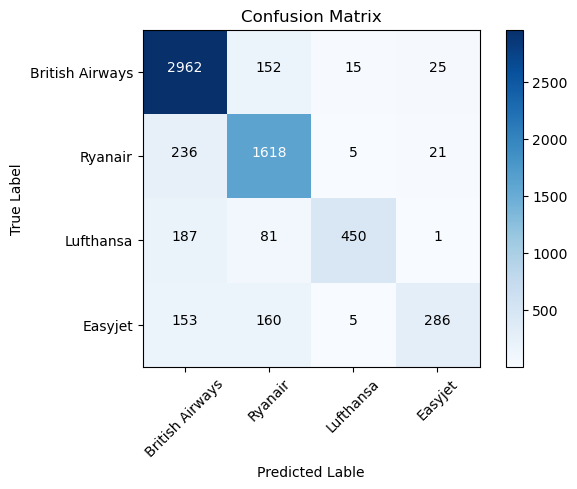

In [29]:
#Model: Naive Bayes
mnb= MultinomialNB()
mnb.fit(count_train,y_train)
pred=mnb.predict(count_test)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)

cm = metrics.confusion_matrix(y_test, pred, labels=['british airways', 'ryanair', 'lufthansa', 'easyjet'])
plot_confusion_matrix(cm,classes=['British Airways', 'Ryanair', 'Lufthansa', 'Easyjet'])

accuracy: 0.843
Confusion Matrix, without Normalization


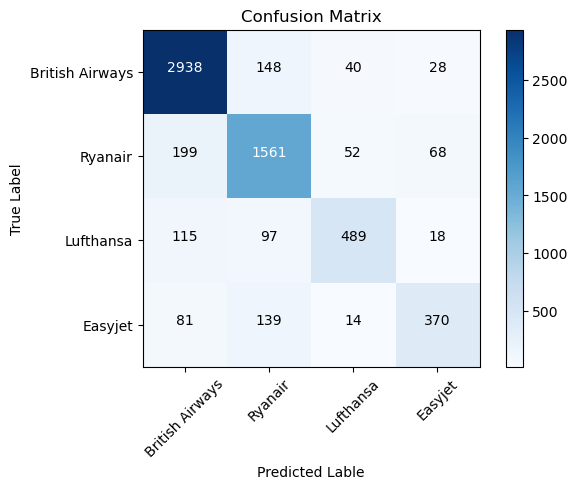

In [30]:
#Model: Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
passive = PassiveAggressiveClassifier()
passive.fit(count_train,y_train)
pred=passive.predict(count_test)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)

cm = metrics.confusion_matrix(y_test, pred, labels=['british airways', 'ryanair', 'lufthansa', 'easyjet'])
plot_confusion_matrix(cm,classes=['British Airways', 'Ryanair', 'Lufthansa', 'Easyjet'])

In [31]:
#Model TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2=tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2=tfidf_vectorizer.transform(X_test)

accuracy: 0.620
Confusion Matrix, without Normalization


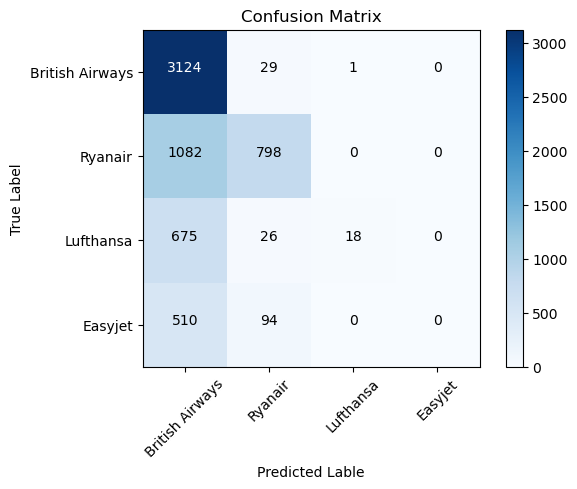

In [32]:
#Model: Naive Bayes
mnb_tf= MultinomialNB()
mnb_tf.fit(tfidf_train_2,y_train)
pred=mnb_tf.predict(tfidf_test_2)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)

cm = metrics.confusion_matrix(y_test, pred, labels=['british airways', 'ryanair', 'lufthansa', 'easyjet'])
plot_confusion_matrix(cm,classes=['British Airways', 'Ryanair', 'Lufthansa', 'Easyjet'])

accuracy: 0.853
Confusion Matrix, without Normalization


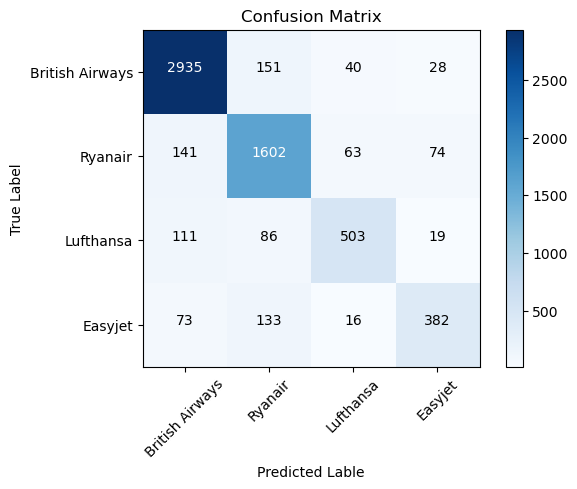

In [33]:
tfidf_vectorizer =TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_test)

pass_tf=PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train,y_train)
pred=pass_tf.predict(tfidf_test)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)

cm = metrics.confusion_matrix(y_test, pred, labels=['british airways', 'ryanair', 'lufthansa', 'easyjet'])
plot_confusion_matrix(cm,classes=['British Airways', 'Ryanair', 'Lufthansa', 'Easyjet'])


In [34]:
#TFIDF: Bigrams
tfidf_vectorizer2 =TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2=tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2=tfidf_vectorizer2.transform(X_test)

accuracy: 0.879
Confusion Matrix, without Normalization


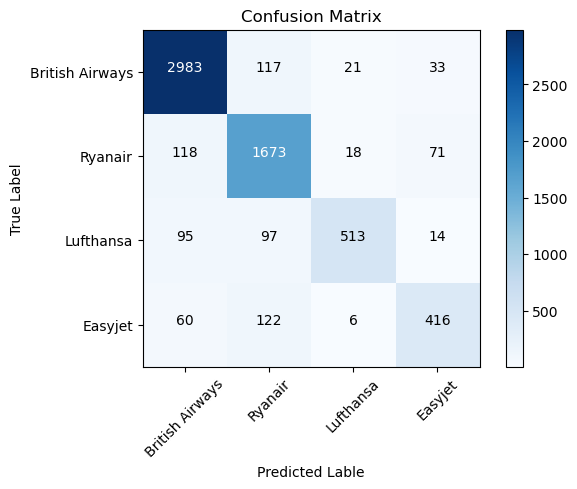

In [35]:
pass_tf=PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2,y_train)
pred=pass_tf.predict(tfidf_test_2)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)

cm = metrics.confusion_matrix(y_test, pred, labels=['british airways', 'ryanair', 'lufthansa', 'easyjet'])
plot_confusion_matrix(cm,classes=['British Airways', 'Ryanair', 'Lufthansa', 'Easyjet'])


In [36]:
#TFIDF: Trigrams
tfidf_vectorizer3 =TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3=tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3=tfidf_vectorizer3.transform(X_test)

accuracy: 0.885
Confusion Matrix, without Normalization


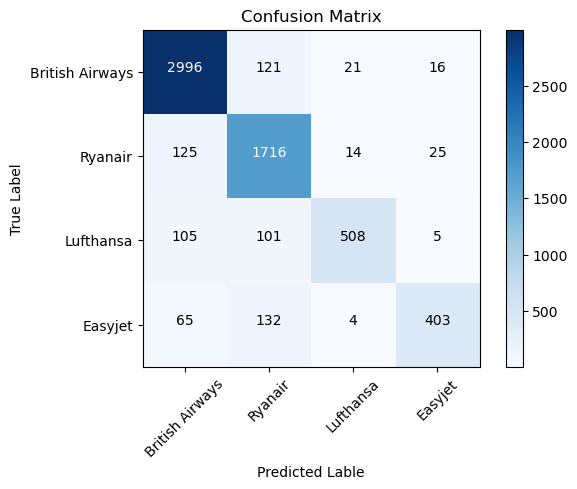

In [37]:
pass_tf=PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3,y_train)
pred=pass_tf.predict(tfidf_test_3)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)

cm = metrics.confusion_matrix(y_test, pred, labels=['british airways', 'ryanair', 'lufthansa', 'easyjet'])
plot_confusion_matrix(cm,classes=['British Airways', 'Ryanair', 'Lufthansa', 'Easyjet'])

In [38]:
def most_informative_feature_for_class (vectorizer,classifier,classlabel,n=5):
    labelid= list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn =sorted(zip(classifier.coef_[labelid],feature_names))[-n:]

    for coef,feat in topn:
        print(classlabel,feat,coef)

most_informative_feature_for_class(tfidf_vectorizer,pass_tf,'british airways')

british airways besser 0.6759313123427162
british airways best 0.6759313123427162
british airways partnering 0.7496001210296834
british airways sleaze 0.8117062755465333
british airways companionship 1.2078431989606144


In [39]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,'ryanair')

ryanair fund 0.8481097121302723
ryanair burn 0.9432906679961742
ryanair burying 0.9608827736997979
ryanair corrupted 0.9608827736997979
ryanair corsica 0.9608827736997979


In [40]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,'lufthansa')

lufthansa britisher 0.7096428632007619
lufthansa understanding 0.7231950705605307
lufthansa unpunctual 0.7504098843745293
lufthansa unqualified 0.8134733042839578
lufthansa conditioner 0.8426961485531927


In [41]:
most_informative_feature_for_class(tfidf_vectorizer,pass_tf,'easyjet')

easyjet cordial 0.672121073799807
easyjet corroborated 0.681988781808969
easyjet corrupt 0.681988781808969
easyjet bossing 0.7006613206590818
easyjet corner 0.8920578751626912
